In [4]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(stringr))
library(parallel)
library(reshape2)
library(pheatmap)
library(RColorBrewer)
library(viridis)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: viridisLite



In [5]:
save_pheatmap <- function(x, filename, width=12, height=12){
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  if(grepl(".png",filename)){
    png(filename, width=width, height=height, units = "in", res=300)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else if(grepl(".pdf",filename)){
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else{
    print("Filename did not contain '.png' or '.pdf'")
  }}

# Read composite score

In [11]:
df<-read.csv('04_CompositeScore/BRI_CompositeScore.csv')

In [14]:
df<-df %>% filter(sample.visitName=='Flu Year 1 Day 0')

In [15]:
Composite_Score_wide<-reshape(df[c("pbmc_sample_id","celltype","composite_score_sum_scaled_mean")], idvar = "pbmc_sample_id", timevar = "celltype", direction = "wide")

In [16]:
rownames(Composite_Score_wide)<-Composite_Score_wide$pbmc_sample_id
Composite_Score_wide<-Composite_Score_wide[-1]


In [17]:
meta_data<-df[c('pbmc_sample_id',"Ages","AgeGroup")] %>% filter (pbmc_sample_id %in% rownames(Composite_Score_wide))

In [18]:
meta_data<-unique(meta_data)
rownames(meta_data)<-meta_data$pbmc_sample_id

In [19]:
annotation<-meta_data %>% arrange(Ages)

In [20]:
ann_colors = list(
  `AgeGroup` = c(Young="#35978f", Older="#bf812d"))

In [85]:
colnames(Composite_Score_wide)<-gsub('composite_score_sum_scaled_mean.','',colnames(Composite_Score_wide))
colnames(Composite_Score_wide)<-gsub(' cell','',colnames(Composite_Score_wide))

In [86]:
callback = function(hc, mat){
  sv = svd(t(mat))$v[,c(1)]
  dend = reorder(as.dendrogram(hc), wts = sv^1)
  as.hclust(dend)
}

png 
  2

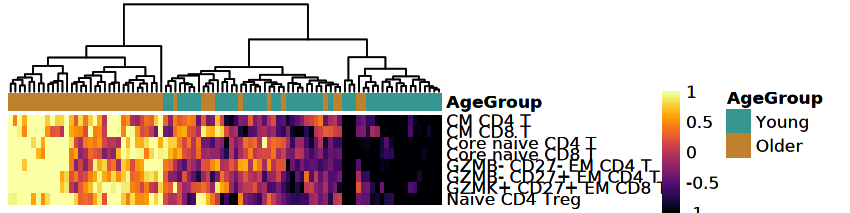

In [87]:
options(repr.plot.width = 180/25.4, repr.plot.height = 45/25.4)
breaks_sequence <- seq(-1, 1, length.out = 100)

p<-pheatmap(t(Composite_Score_wide[meta_data$pbmc_sample_id,]), breaks = breaks_sequence,
         cluster_rows = FALSE, 
         annotation_col =  meta_data[c("AgeGroup")],
         cluster_cols = TRUE, color = inferno(100),
         annotation_colors = ann_colors,
         show_colnames=FALSE,
         show_rownames=TRUE,border_color=NA, clustering_callback = callback,
         scale = 'row')
p
save_pheatmap(p,'FigureF.pdf', width= 180/25.4,height = 45/25.4)